#**WALMART Business Case Study**

In [1]:
# Problem statement:
#   The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against
#   the customer’s gender and the various other factors to help the business make better decisions.
#   They want to understand if the spending habits differ between male and female customers:
#   Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [36]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm,binom,geom,t,ttest_ind,ttest_1samp,ttest_rel,chi
from scipy.stats import f, f_oneway
from scipy.stats import poisson

In [3]:
# Importing dataset

!gdown 1zTvV3i2TvtKN8KH7hV2THT58OdycG4bj

Downloading...
From: https://drive.google.com/uc?id=1zTvV3i2TvtKN8KH7hV2THT58OdycG4bj
To: /content/walmart.csv
100% 23.0M/23.0M [00:00<00:00, 38.0MB/s]


In [7]:
df = pd.read_csv("/content/walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [8]:
df.shape

(550068, 10)

In [9]:
# We have 5,50,068 records in 10 columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [11]:
# We do not have any null values

In [12]:
# We have a column called Marital_Status whose dtype is int because it has values in the form of 0 and 1.
# 0 for unmarried and 1 for married.

# Let's change them into object dtype

In [13]:
df['Marital_Status'] = df['Marital_Status'].replace([0,1],['Unmarried','Married'])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Unmarried,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Unmarried,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Unmarried,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Unmarried,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Unmarried,8,7969


### **Non Graphical Analysis**

In [14]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [15]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           Unmarried       3                 13650       1
1004007  P00105342   M       36-45  12          A              1                           Married         1                 11668       1
         P00115942   M       36-45  12          A              1                           Married         8                 9800        1
         P00115142   M       36-45  12          A              1                           Married         1                 11633       1
         P00114942   M       36-45  12          A              1                           Married         1                 19148       1
                                                                                                                                        ..
1001973  P00265242   M       26-

In [16]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [17]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [18]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [19]:
df['Marital_Status'].value_counts()

Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [20]:
df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [21]:
# Insights of non-graphical analysis.

# Total males: 414259
# Total females: 135809

# Total 7 age groups. Majority of them lies between 26-35

# Total married: 324731
# Total unmarried: 225337

# We have total 3 distinct city categories as A, B, and C.
# B has majority of customers i.e., 231173

### **Graphical Analysis: Univariate and Bivariate**

<Axes: xlabel='Gender', ylabel='Purchase'>

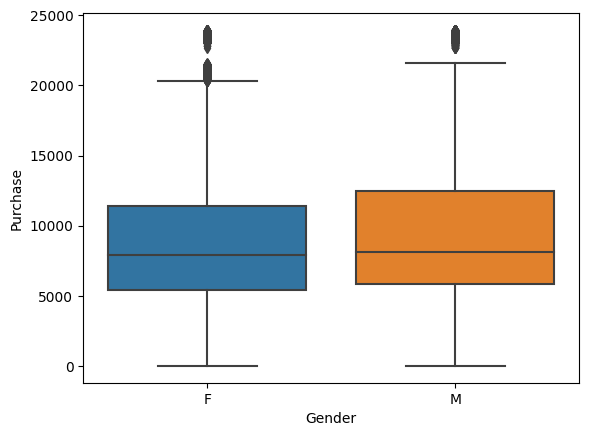

In [22]:
sns.boxplot(data=df,x="Gender",y="Purchase")

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

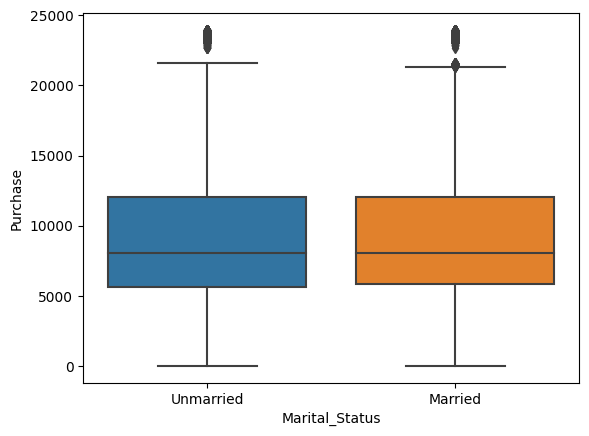

In [23]:
sns.boxplot(data=df,x="Marital_Status",y="Purchase")


<Axes: xlabel='City_Category', ylabel='Purchase'>

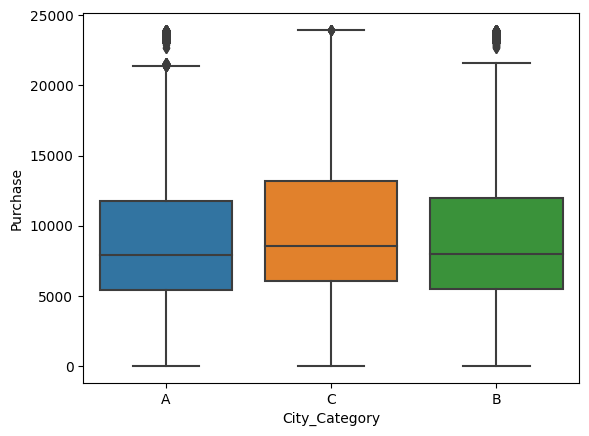

In [24]:
sns.boxplot(data=df,x="City_Category",y="Purchase")


<Axes: xlabel='Purchase', ylabel='Density'>

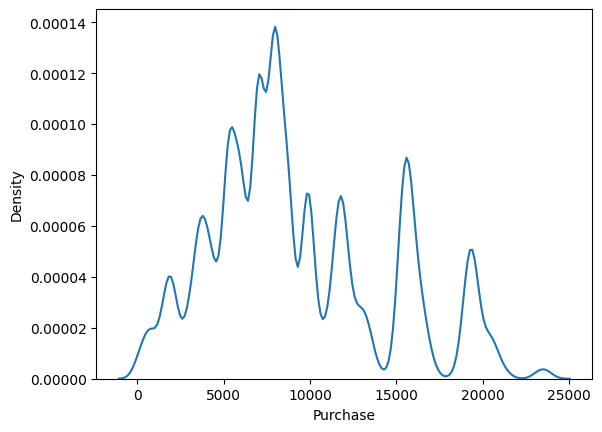

In [25]:
sns.kdeplot(data=df,x="Purchase")

<Axes: xlabel='Purchase', ylabel='Density'>

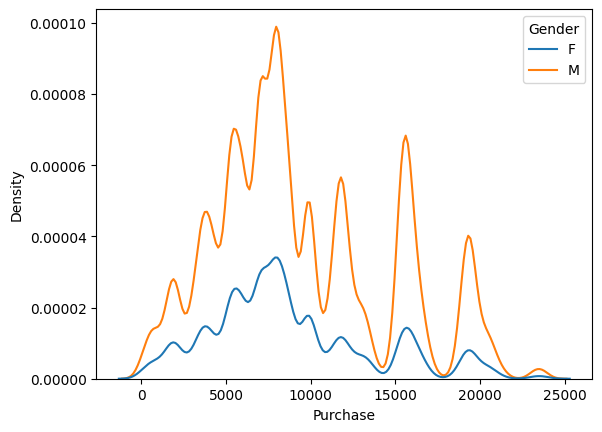

In [26]:
sns.kdeplot(data=df,x="Purchase",hue="Gender")

<Axes: xlabel='Purchase', ylabel='Density'>

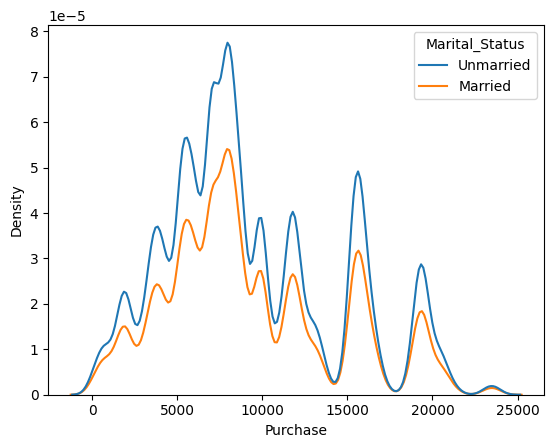

In [27]:
sns.kdeplot(data=df,x="Purchase",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='count'>

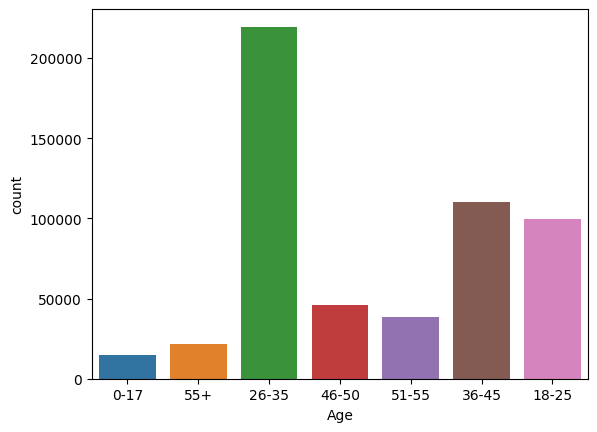

In [28]:
sns.countplot(data=df,x="Age")

<Axes: xlabel='Product_Category', ylabel='count'>

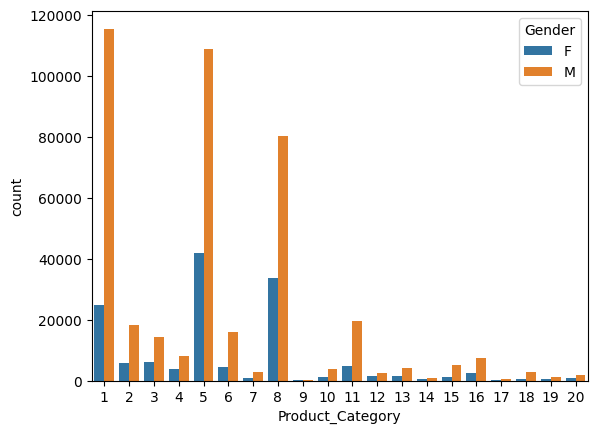

In [29]:
sns.countplot(data=df,x="Product_Category",hue="Gender")

<Axes: xlabel='City_Category', ylabel='Purchase'>

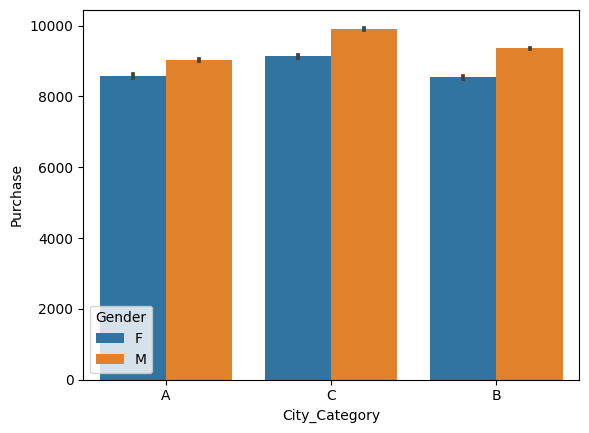

In [30]:
sns.barplot(data=df,x="City_Category",y="Purchase",hue="Gender")

<Axes: xlabel='Age', ylabel='Purchase'>

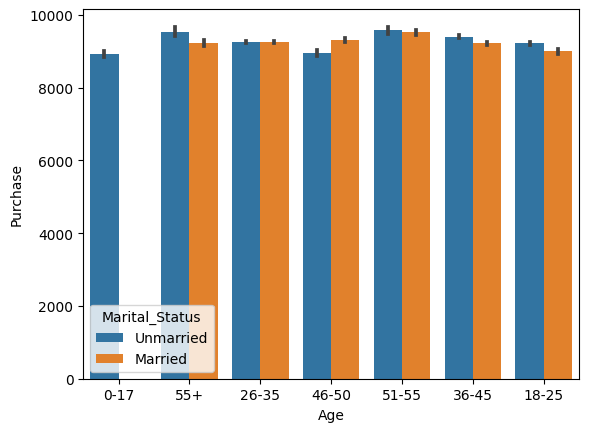

In [31]:
sns.barplot(data=df,x="Age",y="Purchase",hue="Marital_Status")

<Axes: xlabel='Age', ylabel='Purchase'>

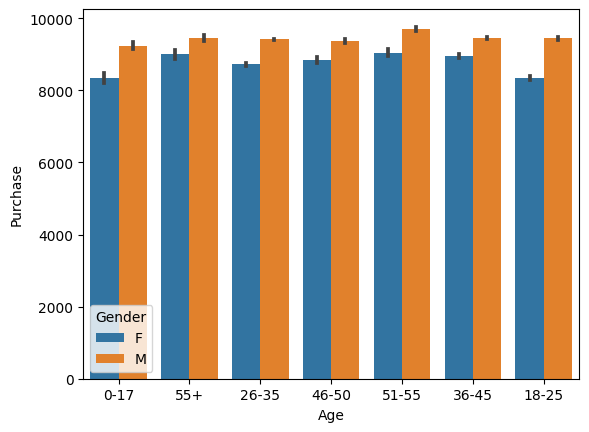

In [32]:

sns.barplot(data=df,x="Age",y="Purchase",hue="Gender")


<Axes: xlabel='Purchase', ylabel='Count'>

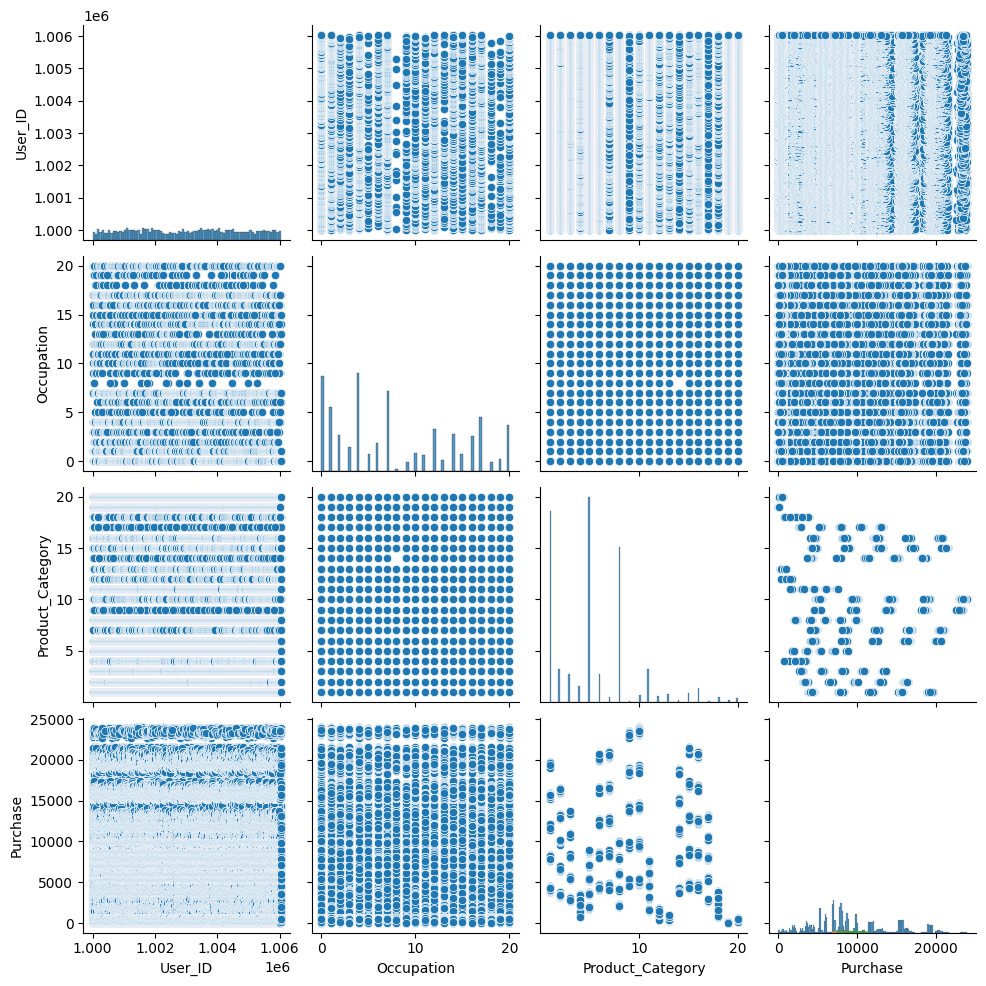

In [34]:
# Purchase Vs Gender
# For 100 sample

sns.pairplot(data=df)
female=pd.Series(df.loc[df["Gender"]=="F"]["Purchase"])
male=pd.Series(df.loc[df["Gender"]=="M"]["Purchase"])


<Axes: ylabel='Count'>

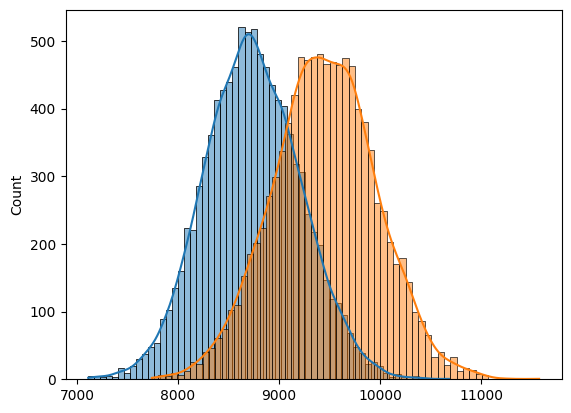

In [35]:
female_clt=[]
fem_samp_100=np.random.choice(female,size=100)
for i in range(10000):
 female_clt.append(np.mean(np.random.choice(female,size=100)))
male_clt=[]
m_samp_100=np.random.choice(male,size=100)
for i in range(10000):
 male_clt.append(np.mean(np.random.choice(male,size=100)))
sns.histplot(female_clt,kde=True)
sns.histplot(male_clt,kde=True)

<Axes: ylabel='Count'>

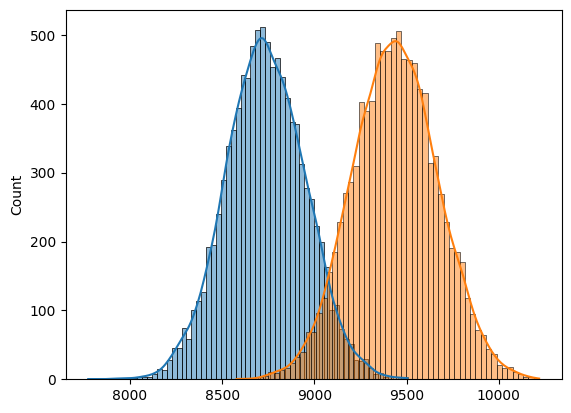

In [38]:
## for 500 samples


female_clt1=[]
fem_samp_500=np.random.choice(female,size=500)
for i in range(10000):
 female_clt1.append(np.mean(np.random.choice(female,size=500)))
male_clt1=[]
m_samp_500=np.random.choice(female,size=500)
for i in range(10000):
  male_clt1.append(np.mean(np.random.choice(male,size=500)))
sns.histplot(female_clt1,kde=True)
sns.histplot(male_clt1,kde=True)


<Axes: ylabel='Count'>

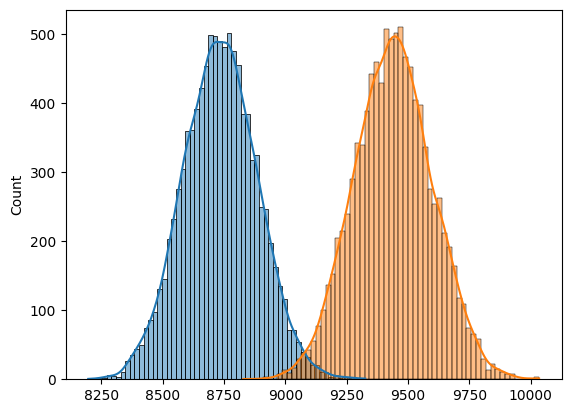

In [39]:
# for 1000 samples

female_clt2=[]
fem_samp_1000=np.random.choice(female,size=1000)
for i in range(10000):
 female_clt2.append(np.mean(np.random.choice(female,size=1000)))
male_clt2=[]
m_samp_1000=np.random.choice(male,size=1000)
for i in range(10000):
 male_clt2.append(np.mean(np.random.choice(male,size=1000)))
sns.histplot(female_clt2,kde=True)
sns.histplot(male_clt2,kde=True)

In [40]:
# by T-test

H0="There is no difference in average purchasing range of male and female"
Ha="Female has less average purchasing range than male"
Alpha=0.01
T_stat,p_val=ttest_ind(fem_samp_1000,m_samp_1000,alternative="less")
print("t statistics: ", T_stat,"p value: ", p_val)
if p_val>Alpha:
 print(H0)
else:
 print(Ha)

t statistics:  -4.56568258833742 p value:  2.640901540193261e-06
Female has less average purchasing range than male


In [41]:
# Purchase Vs Marital_Status

# For 100 sample

married=pd.Series(df.loc[df["Marital_Status"]=="Married"]["Purchase"])
unmarried=pd.Series(df.loc[df["Marital_Status"]=="Unmarried"]["Purchase"])

In [42]:
np.mean(married)

9261.174574082374

In [43]:
np.mean(unmarried)

9265.907618921507

<Axes: ylabel='Count'>

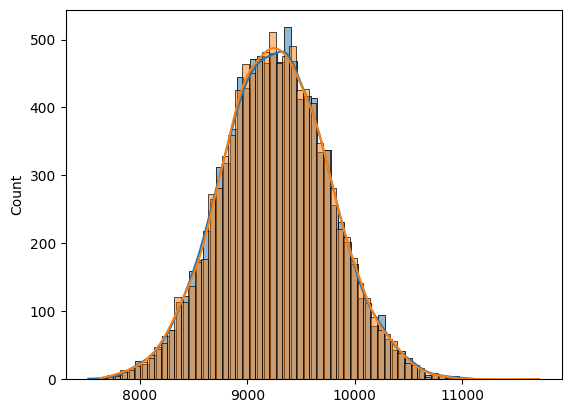

In [44]:
# for 100 samples

unmar_clt=[]
unmar_samp_100=np.random.choice(unmarried,size=100)
for i in range(10000):
 unmar_clt.append(np.mean(np.random.choice(unmarried,size=100)))
mar_clt=[]
unmar_samp_100=np.random.choice(married,size=100)
for i in range(10000):
 mar_clt.append(np.mean(np.random.choice(married,size=100)))
sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)


<Axes: ylabel='Count'>

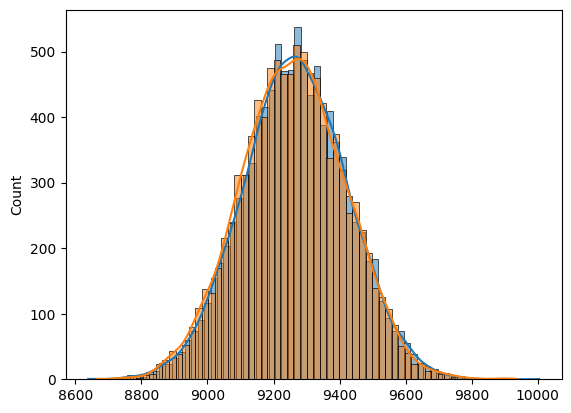

In [45]:
unmar_clt=[]
unmar_samp_1000=np.random.choice(unmarried,size=1000)
for i in range(10000):
  unmar_clt.append(np.mean(np.random.choice(unmarried,size=1000)))
mar_clt=[]
unmar_samp_1000=np.random.choice(married,size=1000)
for i in range(10000):
  mar_clt.append(np.mean(np.random.choice(married,size=1000)))
sns.histplot(unmar_clt,kde=True)
sns.histplot(mar_clt,kde=True)


### **Business Insights**

In [ ]:
# Most of the people in this data are Male, Unmarried
# Majority of people are from "26-35" age group which represent the youth
# Most frequent purchased product category are of 5, 1, and 8
# People stay in the city mostly for one or two years
# Nearly in all age group male has more purchashing count than female.
# Males average purchasing pattern (9249.35, 10103.04) is greater than females average purchasing pattern (8384.92,
# 9156.13) at 99% confidence interval.
